In [200]:
cd /content/drive/MyDrive/Git/ICT_Visual/Code

/content/drive/MyDrive/Git/ICT_Visual/Code


In [201]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [202]:
try :
    loaded_data = np.loadtxt('../Data/diabetes.csv',delimiter=',')
    
    x_data = loaded_data[:, 0:-1]
    t_data = loaded_data[:, [-1]]

    print(f'x_data.shape = {x_data.shape}')
    print(f't_data.shape = {t_data.shape}')

except Exception as err:

    print(str(err))

x_data.shape = (759, 8)
t_data.shape = (759, 1)


In [203]:
from tensorflow.keras.utils import to_categorical

t_data_one_hot = to_categorical(t_data)

In [204]:
print(x_data[:2])
print(t_data_one_hot[:2])

s = np.arange(len(x_data)) # index 생성

# print(s)

np.random.shuffle(s)

# print(s)

x_data = x_data[s]
t_data_one_hot = t_data_one_hot[s]

print(x_data[:2])
print(t_data_one_hot[:2])

[[-0.294118    0.487437    0.180328   -0.292929    0.          0.00149028
  -0.53117    -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  -0.414141    0.         -0.207153
  -0.766866   -0.666667  ]]
[[1. 0.]
 [0. 1.]]
[[-0.647059    0.427136    0.311475   -0.69697     0.         -0.0342771
  -0.895816    0.4       ]
 [-0.294118    0.658291    0.114754   -0.474747   -0.602837    0.00149028
  -0.527754   -0.0666667 ]]
[[0. 1.]
 [0. 1.]]


In [205]:
TEST_SPLIT_RATIO = 0.1

test_nums = int(TEST_SPLIT_RATIO*len(x_data))

print('test_nums = ', test_nums)

x_test = x_data[:test_nums]
t_test = t_data_one_hot[:test_nums]

x_data = x_data[test_nums:]
t_data_one_hot = t_data_one_hot[test_nums:]

print(x_data.shape, t_data_one_hot.shape)
print(x_test.shape, t_test.shape)


test_nums =  75
(684, 8) (684, 2)
(75, 8) (75, 2)


In [206]:
VAL_SPLIT_RATIO = 0.1

val_nums = int(VAL_SPLIT_RATIO*len(x_data))

print('val_nums = ', val_nums)

x_val = x_data[:val_nums]
t_val = t_data_one_hot[:val_nums]

x_data = x_data[val_nums:]
t_data_one_hot = t_data_one_hot[val_nums:]

print(x_data.shape, t_data_one_hot.shape)
print(x_val.shape, t_val.shape)


val_nums =  68
(616, 8) (616, 2)
(68, 8) (68, 2)


In [207]:
model = Sequential()

model.add(Dense(t_data_one_hot.shape[1], input_shape=(x_data.shape[1],), activation='softmax'))

In [208]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [209]:
x_data.shape, t_data_one_hot.shape

((616, 8), (616, 2))

In [210]:
hist = model.fit(x_data, t_data_one_hot, epochs=500, validation_data=(x_val, t_val), verbose=2)

Epoch 1/500
20/20 - 1s - loss: 0.6619 - accuracy: 0.6526 - val_loss: 0.5764 - val_accuracy: 0.7059 - 648ms/epoch - 32ms/step
Epoch 2/500
20/20 - 0s - loss: 0.6459 - accuracy: 0.6510 - val_loss: 0.5681 - val_accuracy: 0.7059 - 51ms/epoch - 3ms/step
Epoch 3/500
20/20 - 0s - loss: 0.6345 - accuracy: 0.6510 - val_loss: 0.5616 - val_accuracy: 0.7059 - 76ms/epoch - 4ms/step
Epoch 4/500
20/20 - 0s - loss: 0.6247 - accuracy: 0.6510 - val_loss: 0.5569 - val_accuracy: 0.7206 - 50ms/epoch - 2ms/step
Epoch 5/500
20/20 - 0s - loss: 0.6170 - accuracy: 0.6542 - val_loss: 0.5539 - val_accuracy: 0.7206 - 70ms/epoch - 3ms/step
Epoch 6/500
20/20 - 0s - loss: 0.6118 - accuracy: 0.6510 - val_loss: 0.5513 - val_accuracy: 0.7353 - 105ms/epoch - 5ms/step
Epoch 7/500
20/20 - 0s - loss: 0.6067 - accuracy: 0.6575 - val_loss: 0.5493 - val_accuracy: 0.7353 - 100ms/epoch - 5ms/step
Epoch 8/500
20/20 - 0s - loss: 0.6022 - accuracy: 0.6558 - val_loss: 0.5478 - val_accuracy: 0.7206 - 102ms/epoch - 5ms/step
Epoch 9/500

In [211]:
model.evaluate(x_test, t_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.4595 - accuracy: 0.7600


[0.459541916847229, 0.7599999904632568]

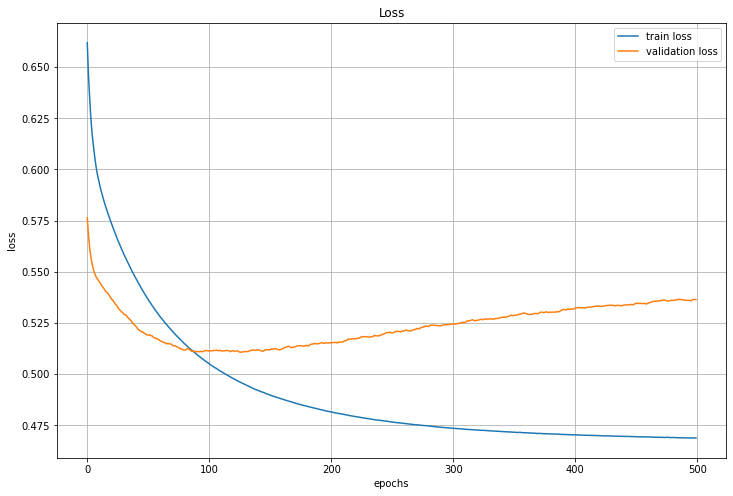

In [212]:
plt.figure(figsize=(12,8))
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

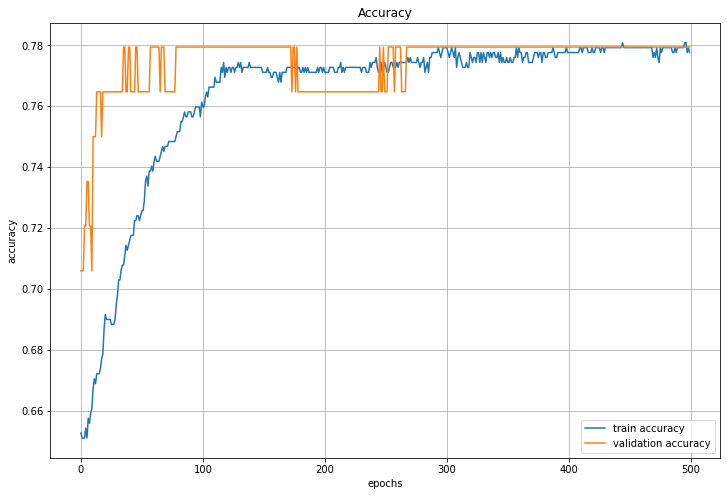

In [213]:
plt.figure(figsize=(12,8))
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()